# Tugas 4 : meringkas tugas

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_data(file_path):
    return pd.read_csv(file_path, sep=',', encoding='utf-8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## import data

In [2]:
data = pd.read_csv('data_terbaru_1.csv')
data.head()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,Serba-serbi Acara Pembekalan Calon Menteri Pra...,Reporter\nDaniel A. Fajri\nEditor\nAndry Triya...,16-10-2024 05:30,Nasional
1,"Diberhentikan Sepihak, Konsil Tenaga Kesehatan...",Reporter\nAnastasya Lavenia Y\nEditor\nNinis C...,16-10-2024 07:30,Nasional
2,"Bahlil Sidang Promosi Doktor Siang Ini, Selesa...",Reporter\nHendrik Yaputra\nEditor\nJuli Hantor...,16-10-2024 04:30,Nasional
3,Bahlil Lahadalia Resmi Sandang Gelar Doktor de...,Reporter\nM. Rizki Yusrial\nEditor\nGrace gand...,16-10-2024 11:30,Bisnis
4,"PPN 12 Persen Berlaku 1 Januari 2025, Ini Daft...",Reporter\nMelynda Dwi Puspita\nEditor\nRr. Ari...,16-10-2024 03:30,Bisnis


## Preprocessing Text

In [14]:
import re

# Definisi fungsi preprocess_text
def preprocess_text(text):
    # Menghilangkan karakter non-alphabetic dan mengubah teks menjadi huruf kecil
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya huruf dan spasi yang diizinkan
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    return text

# Contoh penggunaan fungsi preprocess_text
data['Isi Berita'] = data['Isi Berita'].fillna('').astype(str)
prep_result = data['Isi Berita'].apply(preprocess_text)


In [15]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)  # Menghapus URL
    text = re.sub(r'@[^\s]+', ' ', text)  # Menghapus username (mention)
    text = re.sub(r'[\s]+', ' ', text)  # Menghapus tambahan spasi
    text = re.sub(r'#([^\s]+)', ' ', text)  # Menghapus hashtags
    text = re.sub(r"[^a-zA-Z :\.]", "", text)  # Menghapus tanda baca yang tidak diperlukan
    text = re.sub(r'\d', ' ', text)  # Menghapus angka
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = text.encode('ascii', 'ignore').decode('utf-8')  # Menghapus karakter ASCII dan unicode
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # Menghapus karakter non-ASCII
    text = text.replace('\n', '')  # Menghapus baris baru
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

# Fungsi untuk menghapus stopwords
def clean_stopword(tokens):
    listStopword = set(stopwords.words('indonesian'))  # Mengambil daftar stopwords dalam Bahasa Indonesia
    filtered_words = [word for word in tokens if word.lower() not in listStopword]  # Menghapus stopwords dari tokens
    return filtered_words

# Fungsi untuk memproses teks
def preprocess_text(content):
    result = {}
    for i, text in enumerate(tqdm(content)):  # Menggunakan tqdm untuk menampilkan progress
        cleaned_text = clean_text(text)  # Membersihkan teks
        tokens = word_tokenize(cleaned_text)  # Tokenisasi teks menjadi kata-kata
        cleaned_stopword = clean_stopword(tokens)  # Menghapus stopwords
        result[i] = ' '.join(cleaned_stopword)  # Menggabungkan kata-kata yang sudah dibersihkan menjadi satu string
    return result

# Memproses data teks pada kolom 'Isi Berita'
prep_result = preprocess_text(data['Isi Berita'])

# Menampilkan hasil preproses
for key, value in prep_result.items():
    print(f"{key}: {value}")


100%|██████████| 150/150 [00:00<00:00, 203.41it/s]

0: reporter daniel a. fajri editor andry triyanto tjitra rabu oktober : wib bagikan tempo.co jakarta calon menteri presiden terpilih prabowo subianto mengikuti acara pembekalan padepokan garuda yaksa hambalang bogor jawa barat rabu oktober . orang tercatat hadir acara pembekalan . komandan detasemen pengawalan khusus menteri pertahanan letkol g. borlak calon menteri wakil menteri hadir . baca : pembekalan calon menteri prabowo hambalang materi ai antikorupsi sekretaris jenderal kementerian perdagangan budi santoso calon menteri prabowo berkumpul hambalang rabu pagi oktober . wib . budi mengaku materi pembekalan . menyebut pelatihan selesai . wib . sih temanya macamnya budi kemeja putih . mengaku perlengkapan kemping . baca : calon menteri kabinet prabowo ikuti bimtek pembekalan nginap disediakan budi disinyalir menjabat menteri perdagangan pemerintahan prabowogibran rakabuming raka . pantauan tempo hambalang calon menteri prabowo padepokan garuda yaksa . wib . mantan ketua partai binta

In [8]:
print(prep_result[29])

reporter alfitria nefi p editor juli hantoro rabu oktober : wib bagikan tempo.co jakarta ketua dpp partai demokrasi indonesia perjuangan pdip puan maharani mengungkap alasan pramono anung kediaman prabowo subianto kertanegara selasa oktober . puan calon gubernur jakarta diutus langsung megawati rumah prabowo . iya puan awak media kompleks parlemen senayan rabu oktober . respons alasan pramono anung hadir agenda pembekalan calon menteri . baca : pembekalan calon menteri prabowo hambalang materi ai antikorupsi puan agenda pramono kunjungannya . ya pesan mega prabowo puan ditemui awak media kompleks parlemen senayan rabu oktober . puan enggan bicara pesanpesan dititipkan megawati pramono presiden terpilih . rahasia puan merespons pesan berkaitan kabinet rencana pertemuan megawati prabowo . baca : calon menteri kabinet prabowo ikuti bimtek pembekalan ketua dpr bicara keterangan pengutusan pramono kertanegara harapan pdip depannya sosok diusulkan kabinet anyar . insya allah . kemarin selasa

In [9]:
# Fungsi untuk menghitung TF-IDF
def compute_tfidf(preprocessed_text):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)
    terms = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=terms)
    return tfidf_df

In [10]:
# Memproses data teks pada kolom 'Isi Berita'
prep_result = preprocess_text(data['Isi Berita'])

# Mengubah hasil preproses ke dalam DataFrame
kalimat_preprocessing = pd.DataFrame.from_dict(prep_result, orient='index', columns=['Isi Berita'])

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocessing = tfidf_vectorizer.fit_transform(kalimat_preprocessing['Isi Berita'])

# Mendapatkan istilah dari fitur
terms = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi DataFrame
tfidf_preprocessing_df = pd.DataFrame(data=tfidf_preprocessing.toarray(), columns=terms)

# Menampilkan hasil TF-IDF
tfidf_preprocessing_df

100%|██████████| 150/150 [00:00<00:00, 199.88it/s]


,abadi,abdul,abduweli,abimanyu,absen,abu,ac,acara,aceh,adi,...,yusril,yusuf,zain,zall,zayn,zhang,zon,zona,zulkifli,zwolle
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.084426,0.000000,0.0,...,0.136837,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.015903,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.175223,0.0,0.0,0.035045,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.083002,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.660187,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Impor Library:

Library yang diperlukan diimpor, termasuk TfidfVectorizer dari sklearn untuk menghitung nilai TF-IDF.
Membaca Data:

Data diambil dari file CSV dan dibaca menggunakan pd.read_csv.
Fungsi untuk Membersihkan dan Memproses Teks:

Sama seperti sebelumnya, fungsi clean_text, clean_stopword, dan preprocess_text digunakan untuk membersihkan teks dan menghapus stopwords.
Menghitung TF-IDF:

Menggunakan TfidfVectorizer untuk menghitung nilai TF-IDF dari kalimat yang sudah diproses.
Hasilnya disimpan dalam variabel tfidf_preprocessing.
Mengubah Hasil TF-IDF menjadi DataFrame:

Data hasil TF-IDF diubah menjadi DataFrame menggunakan pd.DataFrame dengan istilah sebagai kolom.
Menampilkan Hasil:

Hasil TF-IDF ditampilkan.

## Cosine Similarity

In [21]:
import pandas as pd
import re

# Fungsi untuk menampilkan similarity matrix
def display_similarity_matrix(similarity_matrix):
    print("Cosine Similarity Matrix:")
    print(similarity_matrix)

# Fungsi untuk preprocess teks
def preprocess_text(text):
    # Pastikan input adalah string
    if isinstance(text, str):
        # Menghilangkan karakter non-alphabetic dan mengubah teks menjadi huruf kecil
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya huruf dan spasi yang diizinkan
        text = text.lower()  # Mengubah teks menjadi huruf kecil
    return text

# Fungsi untuk membaca data (periksa apakah ada definisi read_data)
def read_data(filename):
    return pd.read_csv(filename)

# Fungsi untuk menghitung TF-IDF (tambahkan implementasi yang sesuai)
def compute_tfidf(corpus):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    return pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Main execution
if __name__ == "__main__":
    # Membaca data
    data = read_data('data_terbaru_1.csv')

    # Mengganti None atau NaN dengan string kosong
    data['Isi Berita'] = data['Isi Berita'].fillna('').astype(str)

    # Memproses data teks pada kolom 'Isi Berita' menggunakan apply
    data['Isi Berita'] = data['Isi Berita'].apply(preprocess_text)

    # Menghitung TF-IDF
    tfidf_preprocessing_df = compute_tfidf(data['Isi Berita'])

    # Menghitung cosine similarity
    similarity_matrix = tfidf_preprocessing_df.dot(tfidf_preprocessing_df.T)

    # Menampilkan similarity matrix
    display_similarity_matrix(similarity_matrix)


Cosine Similarity Matrix:
          0         1         2         3         4         5         6    \
0    1.000000  0.082837  0.088378  0.099869  0.064481  0.341374  0.394216   
1    0.082837  1.000000  0.084052  0.122398  0.069796  0.067957  0.072976   
2    0.088378  0.084052  1.000000  0.488062  0.056166  0.083849  0.104650   
3    0.099869  0.122398  0.488062  1.000000  0.153133  0.082265  0.117249   
4    0.064481  0.069796  0.056166  0.153133  1.000000  0.049370  0.065222   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.053341  0.228550  0.052064  0.130802  0.070165  0.043377  0.069967   
146  0.160917  0.099045  0.106376  0.135745  0.061495  0.146316  0.168706   
147  0.206359  0.092307  0.094281  0.089505  0.068356  0.165221  0.162530   
148  0.094107  0.064251  0.045544  0.075080  0.050479  0.097699  0.094148   
149  0.060315  0.048651  0.057603  0.062967  0.049531  0.058050  0.062042   

          7         8         9    ...       140 

Fungsi display_similarity_matrix(similarity_matrix):

Fungsi ini menerima parameter similarity_matrix (DataFrame yang berisi matriks kesamaan) dan mencetaknya ke layar.
Penggunaan Fungsi dalam Main execution:

Setelah menghitung similarity_matrix, fungsi display_similarity_matrix() dipanggil untuk menampilkan hasilnya.

In [22]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,0.082837,0.088378,0.099869,0.064481,0.341374,0.394216,0.464797,0.166064,0.067778,...,0.075681,0.042268,0.180668,0.095901,0.069451,0.053341,0.160917,0.206359,0.094107,0.060315
1,0.082837,1.000000,0.084052,0.122398,0.069796,0.067957,0.072976,0.079469,0.106012,0.097342,...,0.103086,0.038342,0.087918,0.131610,0.065680,0.228550,0.099045,0.092307,0.064251,0.048651
2,0.088378,0.084052,1.000000,0.488062,0.056166,0.083849,0.104650,0.084508,0.078552,0.067493,...,0.093865,0.030845,0.083424,0.044090,0.068602,0.052064,0.106376,0.094281,0.045544,0.057603
3,0.099869,0.122398,0.488062,1.000000,0.153133,0.082265,0.117249,0.100348,0.092625,0.083861,...,0.107105,0.065741,0.113173,0.057532,0.073766,0.130802,0.135745,0.089505,0.075080,0.062967
4,0.064481,0.069796,0.056166,0.153133,1.000000,0.049370,0.065222,0.070059,0.063525,0.041070,...,0.050831,0.036764,0.138023,0.042449,0.046554,0.070165,0.061495,0.068356,0.050479,0.049531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.053341,0.228550,0.052064,0.130802,0.070165,0.043377,0.069967,0.056313,0.079675,0.063556,...,0.073234,0.021244,0.077791,0.036639,0.051794,1.000000,0.049621,0.055450,0.049634,0.047041
146,0.160917,0.099045,0.106376,0.135745,0.061495,0.146316,0.168706,0.153075,0.101851,0.071527,...,0.112030,0.049069,0.207912,0.085581,0.098722,0.049621,1.000000,0.138818,0.088264,0.085859
147,0.206359,0.092307,0.094281,0.089505,0.068356,0.165221,0.162530,0.176426,0.134906,0.077196,...,0.106182,0.058242,0.167167,0.178327,0.079204,0.055450,0.138818,1.000000,0.087924,0.073401
148,0.094107,0.064251,0.045544,0.075080,0.050479,0.097699,0.094148,0.124208,0.165551,0.051357,...,0.062353,0.050881,0.094519,0.068863,0.057911,0.049634,0.088264,0.087924,1.000000,0.044214


## Graph

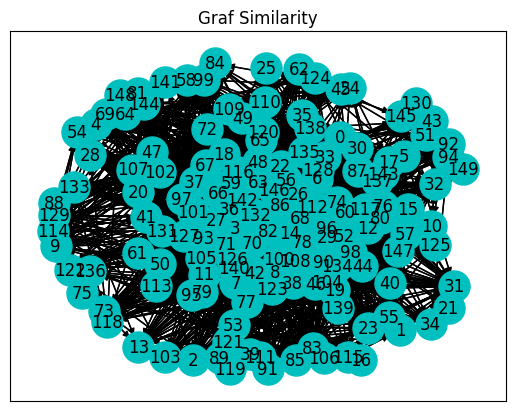

In [23]:
# Fungsi untuk menggambar graf berdasarkan similarity matrix
def draw_similarity_graph(similarity_matrix):
    graph = nx.DiGraph()  # Membuat directed graph

    # Menambahkan node ke graf
    for i in range(len(similarity_matrix)):
        graph.add_node(i)

    # Menambahkan edge berdasarkan similarity matrix
    for i in range(len(similarity_matrix)):
        for j in range(len(similarity_matrix)):
            similarity_value = similarity_matrix.iloc[i, j]
            if similarity_value > 0.1 and i != j:  # Threshold untuk menambahkan edge
                graph.add_edge(i, j)

    # Menggambar graf
    pos = nx.spring_layout(graph, k=2)  # Posisi node
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='c')
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Graf Similarity")
    plt.show()  # Menampilkan graf

# Contoh pemanggilan fungsi
if __name__ == "__main__":
    # Setelah menghitung similarity_matrix
    draw_similarity_graph(similarity_matrix)  # Panggil fungsi untuk menggambar graf


## Matrix Centralitas

*   Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan.



### Closeness Centrality

In [24]:
# Menghitung Cosine Centrality dari matriks kesamaan
cosine_centrality = {}

# Menghitung Cosine Centrality untuk setiap node
for i in range(len(similarity_matrix)):
    cosine_centrality[i] = sum(similarity_matrix.iloc[i]) / (len(similarity_matrix) - 1)  # menghitung nilai rata-rata sebagai contoh

# Mengurutkan berdasarkan nilai Cosine Centrality
sorted_cosine_centrality = sorted(cosine_centrality.items(), key=lambda x: x[1], reverse=True)

print("Cosine Centrality:")
for node, cosine in sorted_cosine_centrality:
    print(f"Node {node}: {cosine:.4f}")


Cosine Centrality:
Node 15: 0.1968
Node 46: 0.1968
Node 76: 0.1968
Node 105: 0.1968
Node 135: 0.1949
Node 7: 0.1914
Node 37: 0.1914
Node 67: 0.1914
Node 97: 0.1905
Node 127: 0.1905
Node 0: 0.1881
Node 30: 0.1881
Node 60: 0.1881
Node 6: 0.1859
Node 36: 0.1859
Node 66: 0.1859
Node 96: 0.1859
Node 126: 0.1859
Node 90: 0.1858
Node 120: 0.1858
Node 12: 0.1815
Node 42: 0.1815
Node 71: 0.1815
Node 5: 0.1785
Node 35: 0.1785
Node 65: 0.1785
Node 95: 0.1785
Node 125: 0.1785
Node 101: 0.1783
Node 132: 0.1734
Node 20: 0.1703
Node 50: 0.1703
Node 79: 0.1703
Node 109: 0.1703
Node 139: 0.1703
Node 8: 0.1668
Node 38: 0.1668
Node 68: 0.1668
Node 98: 0.1668
Node 128: 0.1668
Node 3: 0.1653
Node 33: 0.1653
Node 63: 0.1653
Node 93: 0.1653
Node 123: 0.1653
Node 29: 0.1635
Node 59: 0.1635
Node 10: 0.1595
Node 40: 0.1595
Node 70: 0.1595
Node 100: 0.1595
Node 22: 0.1582
Node 52: 0.1582
Node 82: 0.1582
Node 2: 0.1580
Node 32: 0.1580
Node 62: 0.1580
Node 92: 0.1580
Node 122: 0.1580
Node 18: 0.1573
Node 48: 0.157

In [25]:
# Fungsi untuk menghitung PageRank dan menampilkan ringkasan berdasarkan 3 nilai tertinggi
def summarize_pagerank(similarity_matrix, sentences):
    # Membuat graf directed graph berdasarkan similarity matrix
    graph = nx.DiGraph()
    for i in range(len(similarity_matrix)):
        graph.add_node(i)
    for i in range(len(similarity_matrix)):
        for j in range(len(similarity_matrix)):
            similarity_value = similarity_matrix.iloc[i, j]
            if similarity_value > 0.1 and i != j:
                graph.add_edge(i, j)

    # Menghitung PageRank
    pagerank_preprocessing = nx.pagerank(graph)

    # Mengurutkan PageRank dari nilai tertinggi ke terendah
    sorted_pagerank_preprocessing = sorted(pagerank_preprocessing.items(), key=lambda x: x[1], reverse=True)

    # Menampilkan tiga node tertinggi dan kalimat terkait
    ringkasan_pagerank_preprocessing = ""
    print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
    for node, pagerank_value in sorted_pagerank_preprocessing[:3]:
        top_sentence = sentences[node]
        ringkasan_pagerank_preprocessing += top_sentence + " "
        print(f"Node {node}: Page Rank = {pagerank_value:.4f}")
        print(f"Kalimat: {top_sentence}\n")

    return ringkasan_pagerank_preprocessing

# Main execution
if __name__ == "__main__":
    # Misalkan similarity_matrix dan kalimat sudah tersedia
    ringkasan_pagerank = summarize_pagerank(similarity_matrix, kalimat_preprocessing['Isi Berita'])

    # Menampilkan ringkasan hasil PageRank
    print("Ringkasan Berdasarkan PageRank:")
    print(ringkasan_pagerank)


Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 116: Page Rank = 0.0105
Kalimat: reporter haura hamidah editor nurhadi rabu oktober : wib bagikan tempo.co jakarta prabowo subianto berencana memasang wakil menteri keuangan wamenkeu membantu kerja sri mulyani . presiden terpilih sri mulyani bertugas menteri keuangan kabinet pemerintahannya . wamenkeu thomas djiwandono suahasil nazara anggito abimanyu . ketiganya diundang kediaman prabowo jalan kertanegara nomor jakarta selasa kemarin oktober . thomas djiwandono suahasil nazara wamenkeu menjabat . anggito abimanyu akademisi universitas gadjah mada . baca : prabowo bentuk kementerian koperasi ekonom : butuh dukungan politik riil thomas m. djiwandono thomas menjabat wamenkeu pimpinan sri mulyani berasal kader gerindra . thomas lahir jakarta mei . anak pasangan soedradjad djiwandono biantiningsih miderawati . terjun dunia politik wamenkeu wartawan magang majalah tempo . melanjutkan kariernya wartawan indonesia business weekly .